In [1]:
# importing libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# machine learning model
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score, fbeta_score

In [2]:
dataframe = pd.read_csv("data/diabetes.csv")
df = dataframe.copy()
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print("The columns are:",df.columns)
print("The shape of the dataframe is:", df.shape)

The columns are: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
The shape of the dataframe is: (768, 9)


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
for column in df.columns:
    print(column,"has", df[column].nunique(), " number of unique categories.")

Pregnancies has 17  number of unique categories.
Glucose has 136  number of unique categories.
BloodPressure has 47  number of unique categories.
SkinThickness has 51  number of unique categories.
Insulin has 186  number of unique categories.
BMI has 248  number of unique categories.
DiabetesPedigreeFunction has 517  number of unique categories.
Age has 52  number of unique categories.
Outcome has 2  number of unique categories.


### Observations:
- There are no null values in any of the columns
- There are significant differences between the mean and median of insulin indicating that there might be many outliers
- Average BMI is also between overweight and obese.

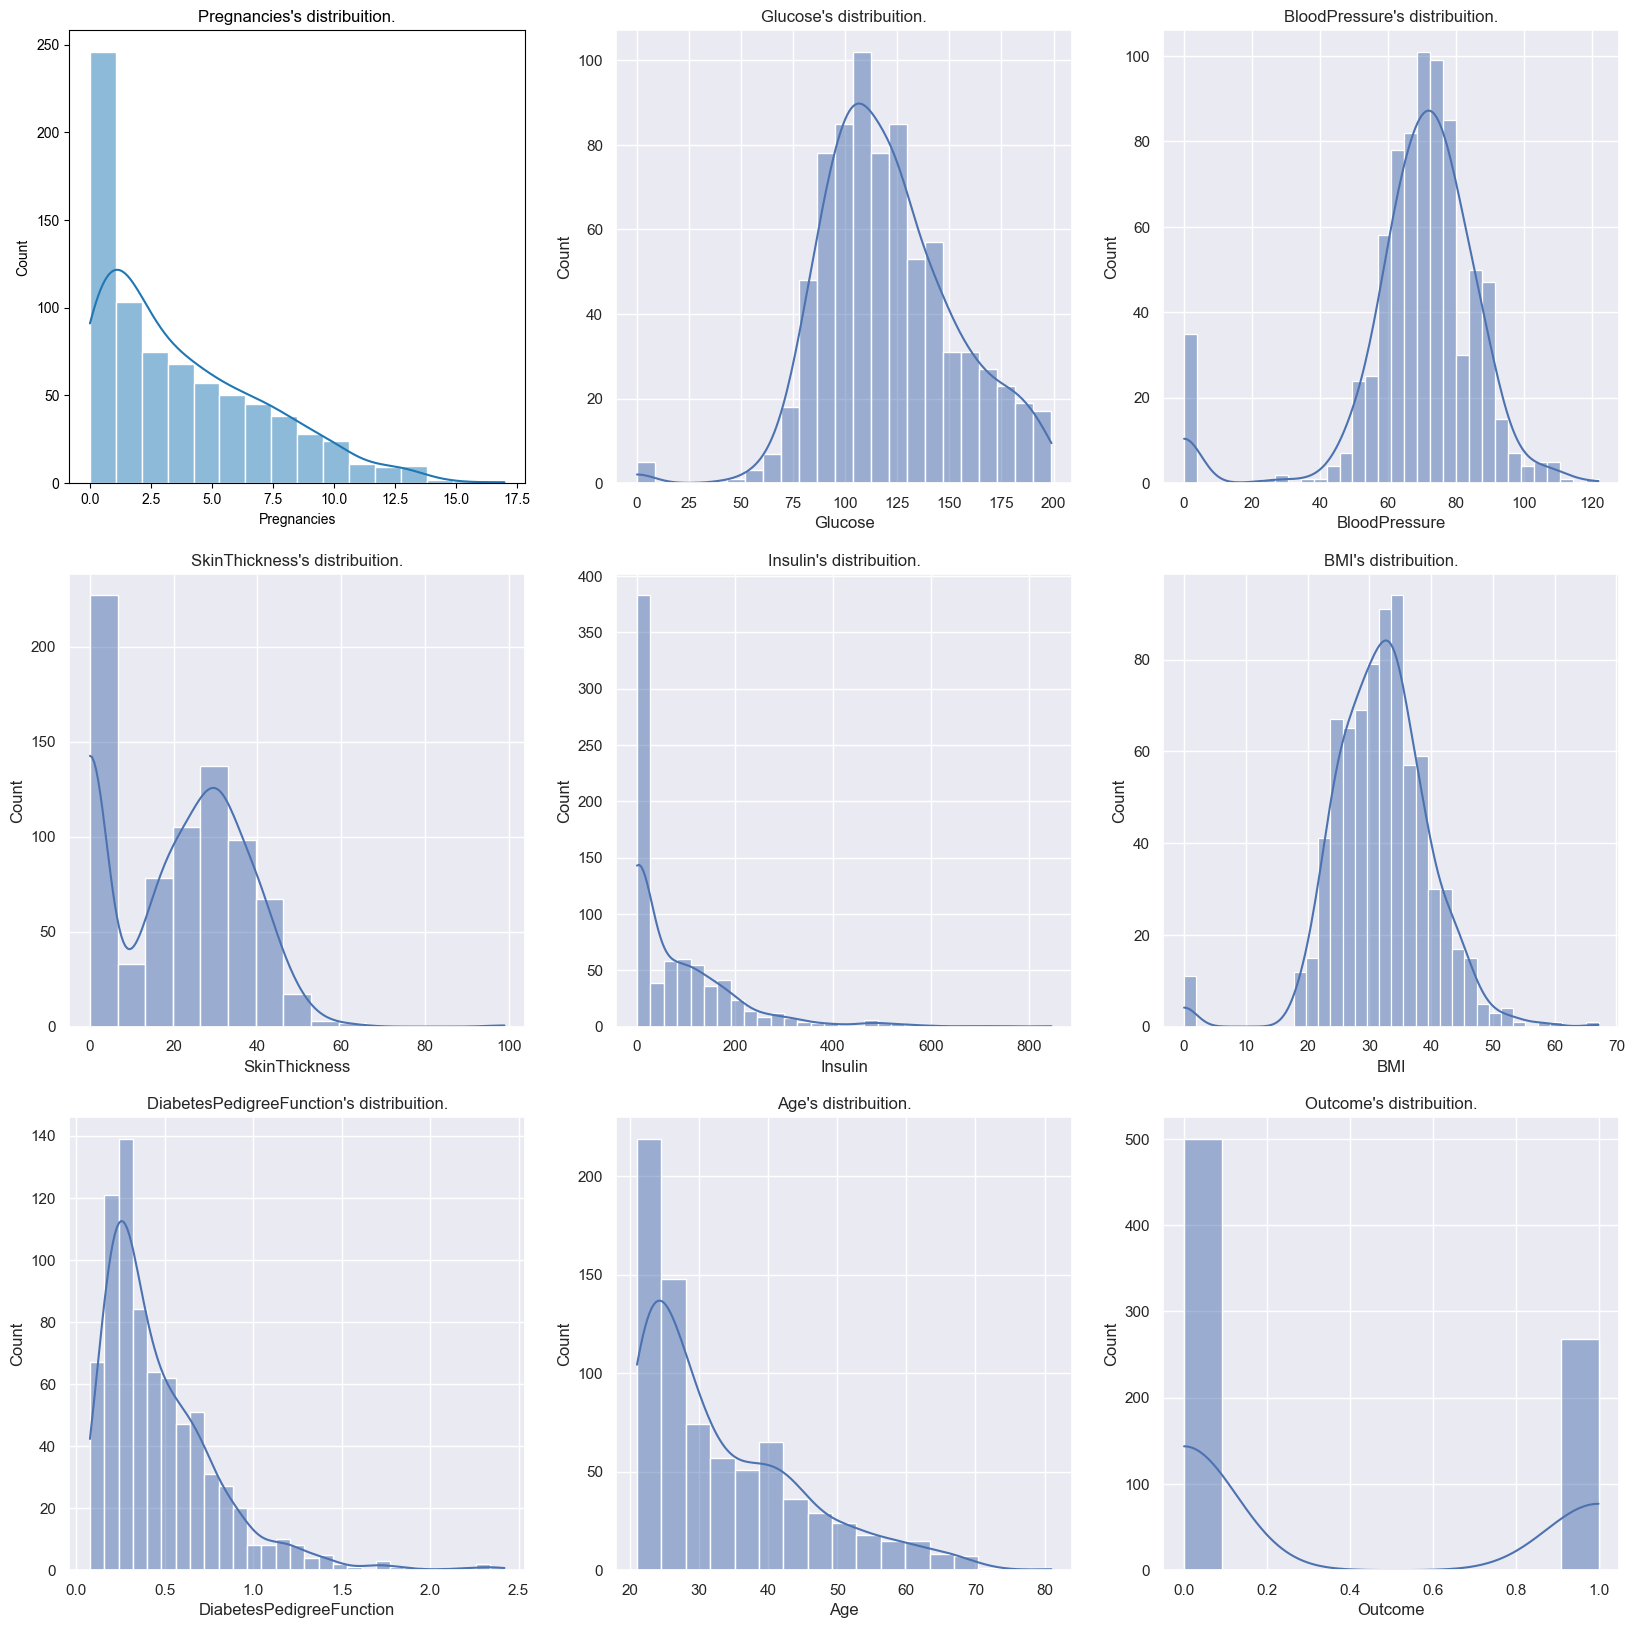

In [7]:
plt.figure(figsize=(20,20))
for tups in enumerate(df.columns):
    plt.subplot(3, 3, tups[0]+1)
    sns.set(rc={'figure.figsize':(7,5)})
    sns.histplot(data=df, x=tups[1], kde=True)
    plt.title("{}'s distribuition.".format(tups[1]))
plt.show()

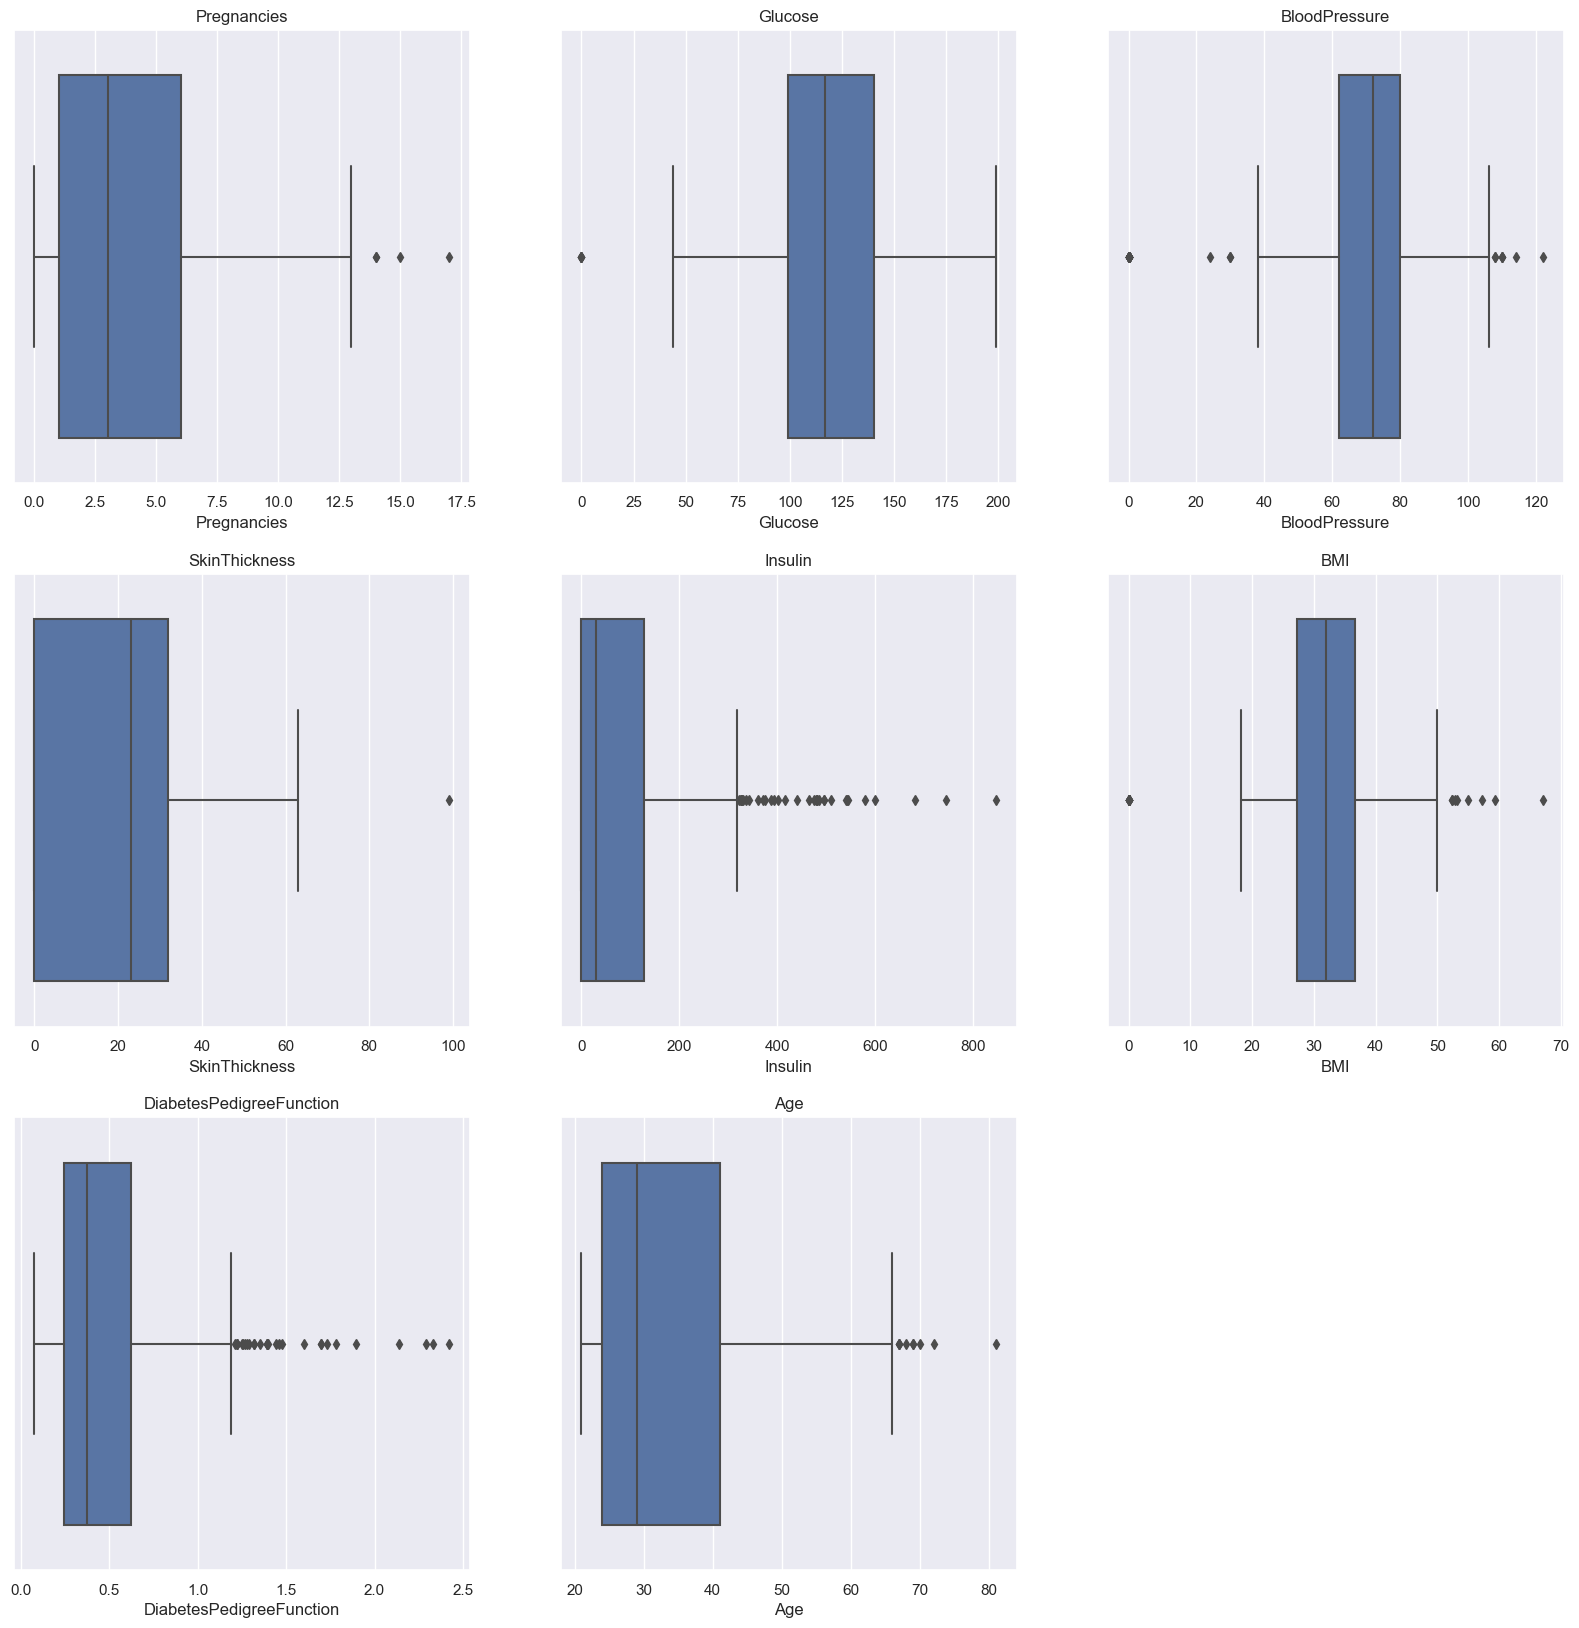

In [8]:
independent_feature = [column for column in df.columns if column not in ['Outcome']]
plt.figure(figsize=(20,20))
for tups in enumerate(independent_feature):
    plt.subplot(3, 3, tups[0]+1)
    sns.set(rc={'figure.figsize':(7,5)})
    sns.boxplot(data=df, x=tups[1])
    plt.title("{}".format(tups[1]))
plt.show()

In [9]:
def outlier_trimmer(data_set, feature, trimming_value, pos = 'upper'):
    threshold=data_set[feature].quantile(trimming_value/100)
    if pos == 'lower':
        data_set=data_set[data_set[feature]>threshold]
    else:
        data_set=data_set[data_set[feature]<threshold]
    return data_set

In [10]:
for column in ['BloodPressure','SkinThickness','BMI','Age']:
    df = outlier_trimmer(df, column, 99)
print("Shape of dataframe after trimming BloodPressure, SkinThickness, BMI and age is: ",df.shape)
    
for column in ['Insulin','DiabetesPedigreeFunction']:
    df = outlier_trimmer(df, column, 97)
print("Shape of dataframe after trimming Insulin and DiabetesPedigreeFunction is: ",df.shape)
 
for column in ['BMI','Glucose', 'BloodPressure']:
    df = outlier_trimmer(df, column, 0.5, 'lower')
print("Shape of dataframe after trimming BloodPressure, Glucose and BMI is: ",df.shape)

Shape of dataframe after trimming BloodPressure, SkinThickness, BMI and age is:  (733, 9)
Shape of dataframe after trimming Insulin and DiabetesPedigreeFunction is:  (689, 9)
Shape of dataframe after trimming BloodPressure, Glucose and BMI is:  (649, 9)


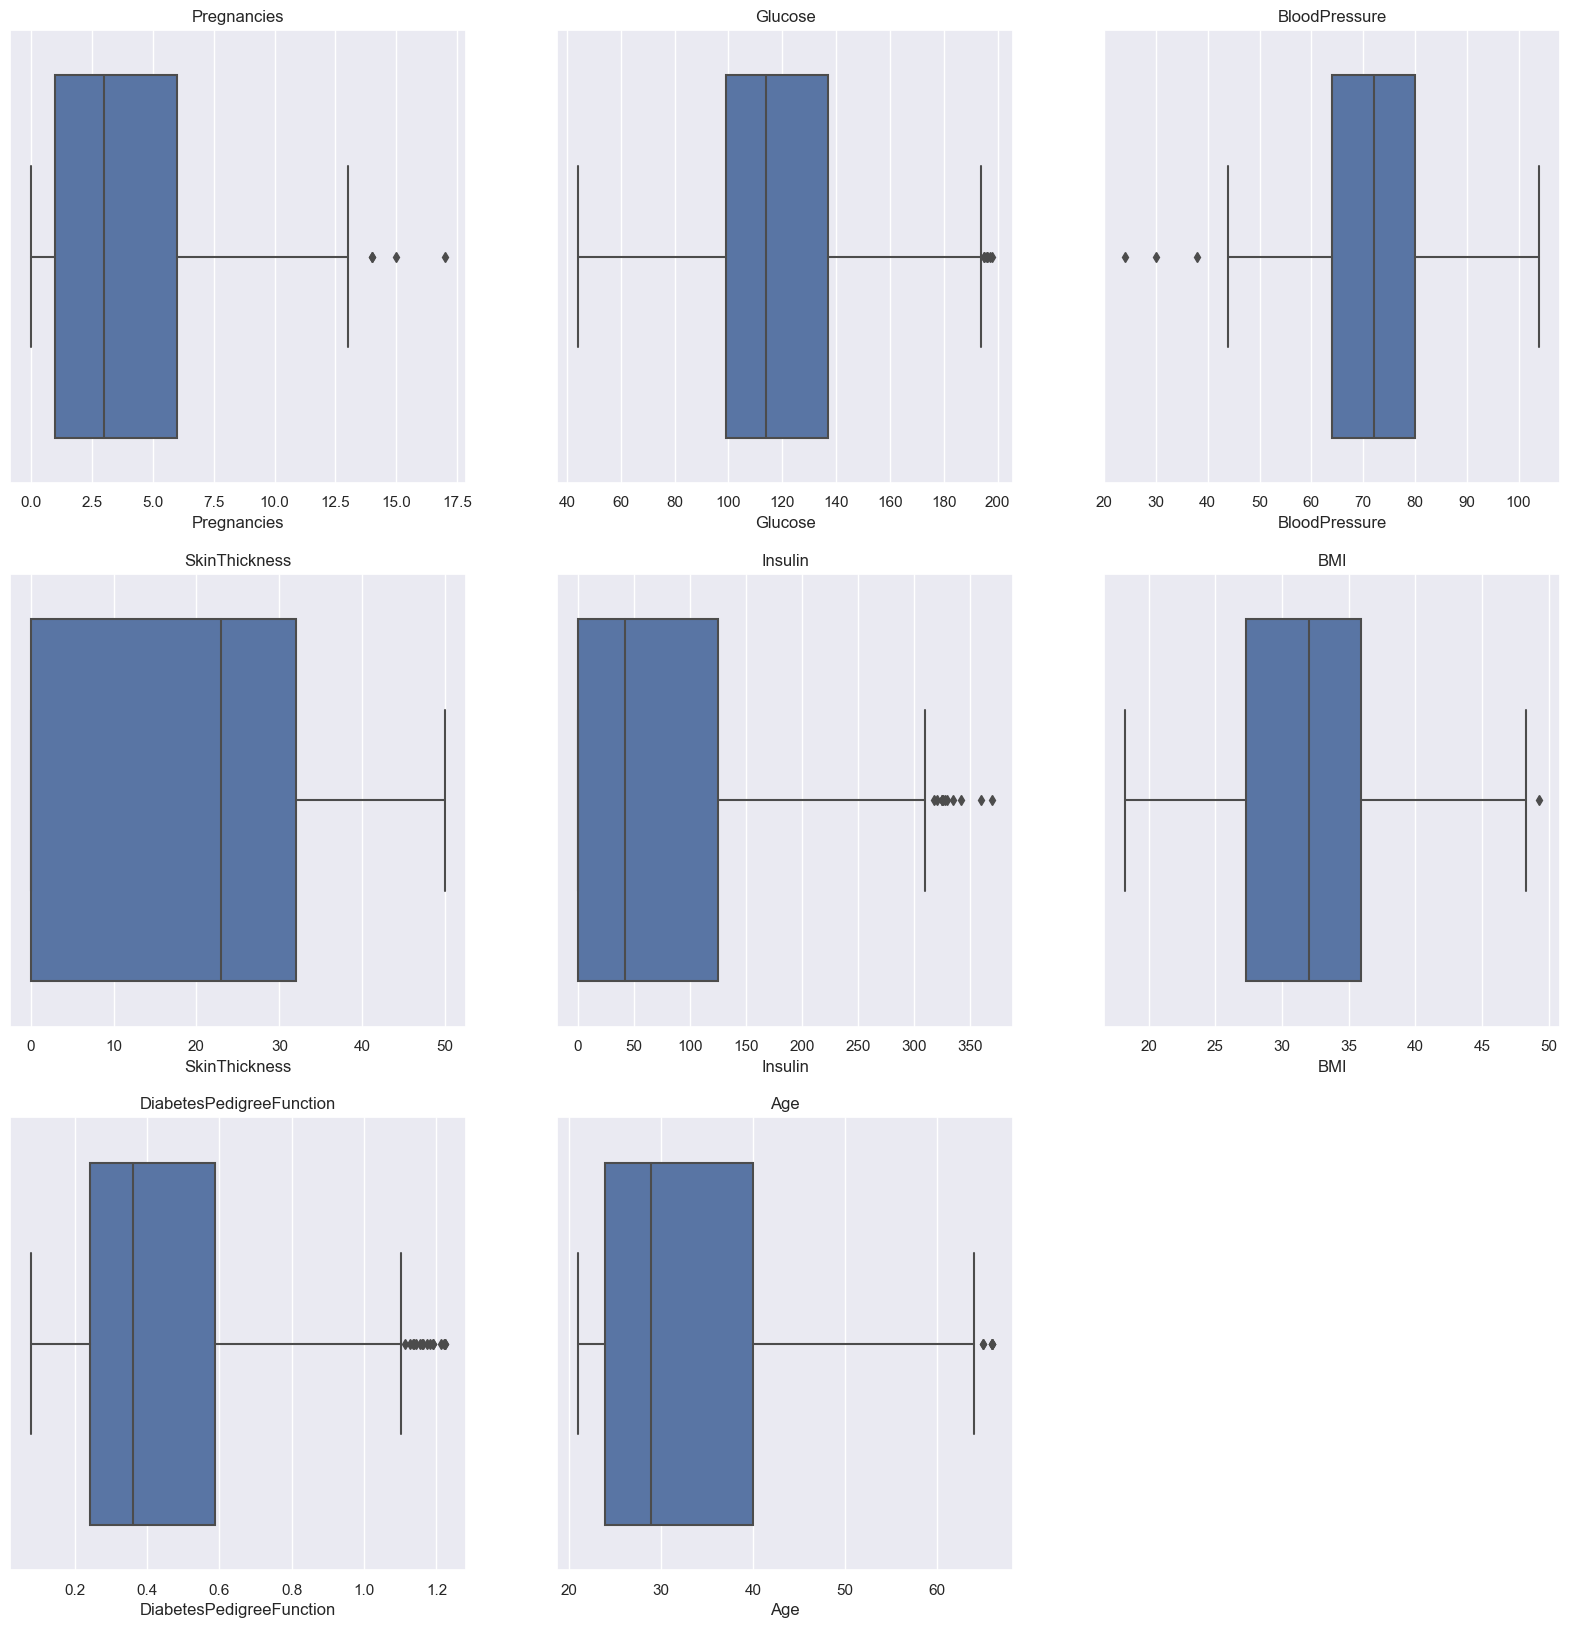

In [11]:
plt.figure(figsize=(20,20))
for tups in enumerate(independent_feature):
    plt.subplot(3, 3, tups[0]+1)
    sns.set(rc={'figure.figsize':(7,5)})
    sns.boxplot(data=df, x=tups[1])
    plt.title("{}".format(tups[1]))
plt.show()

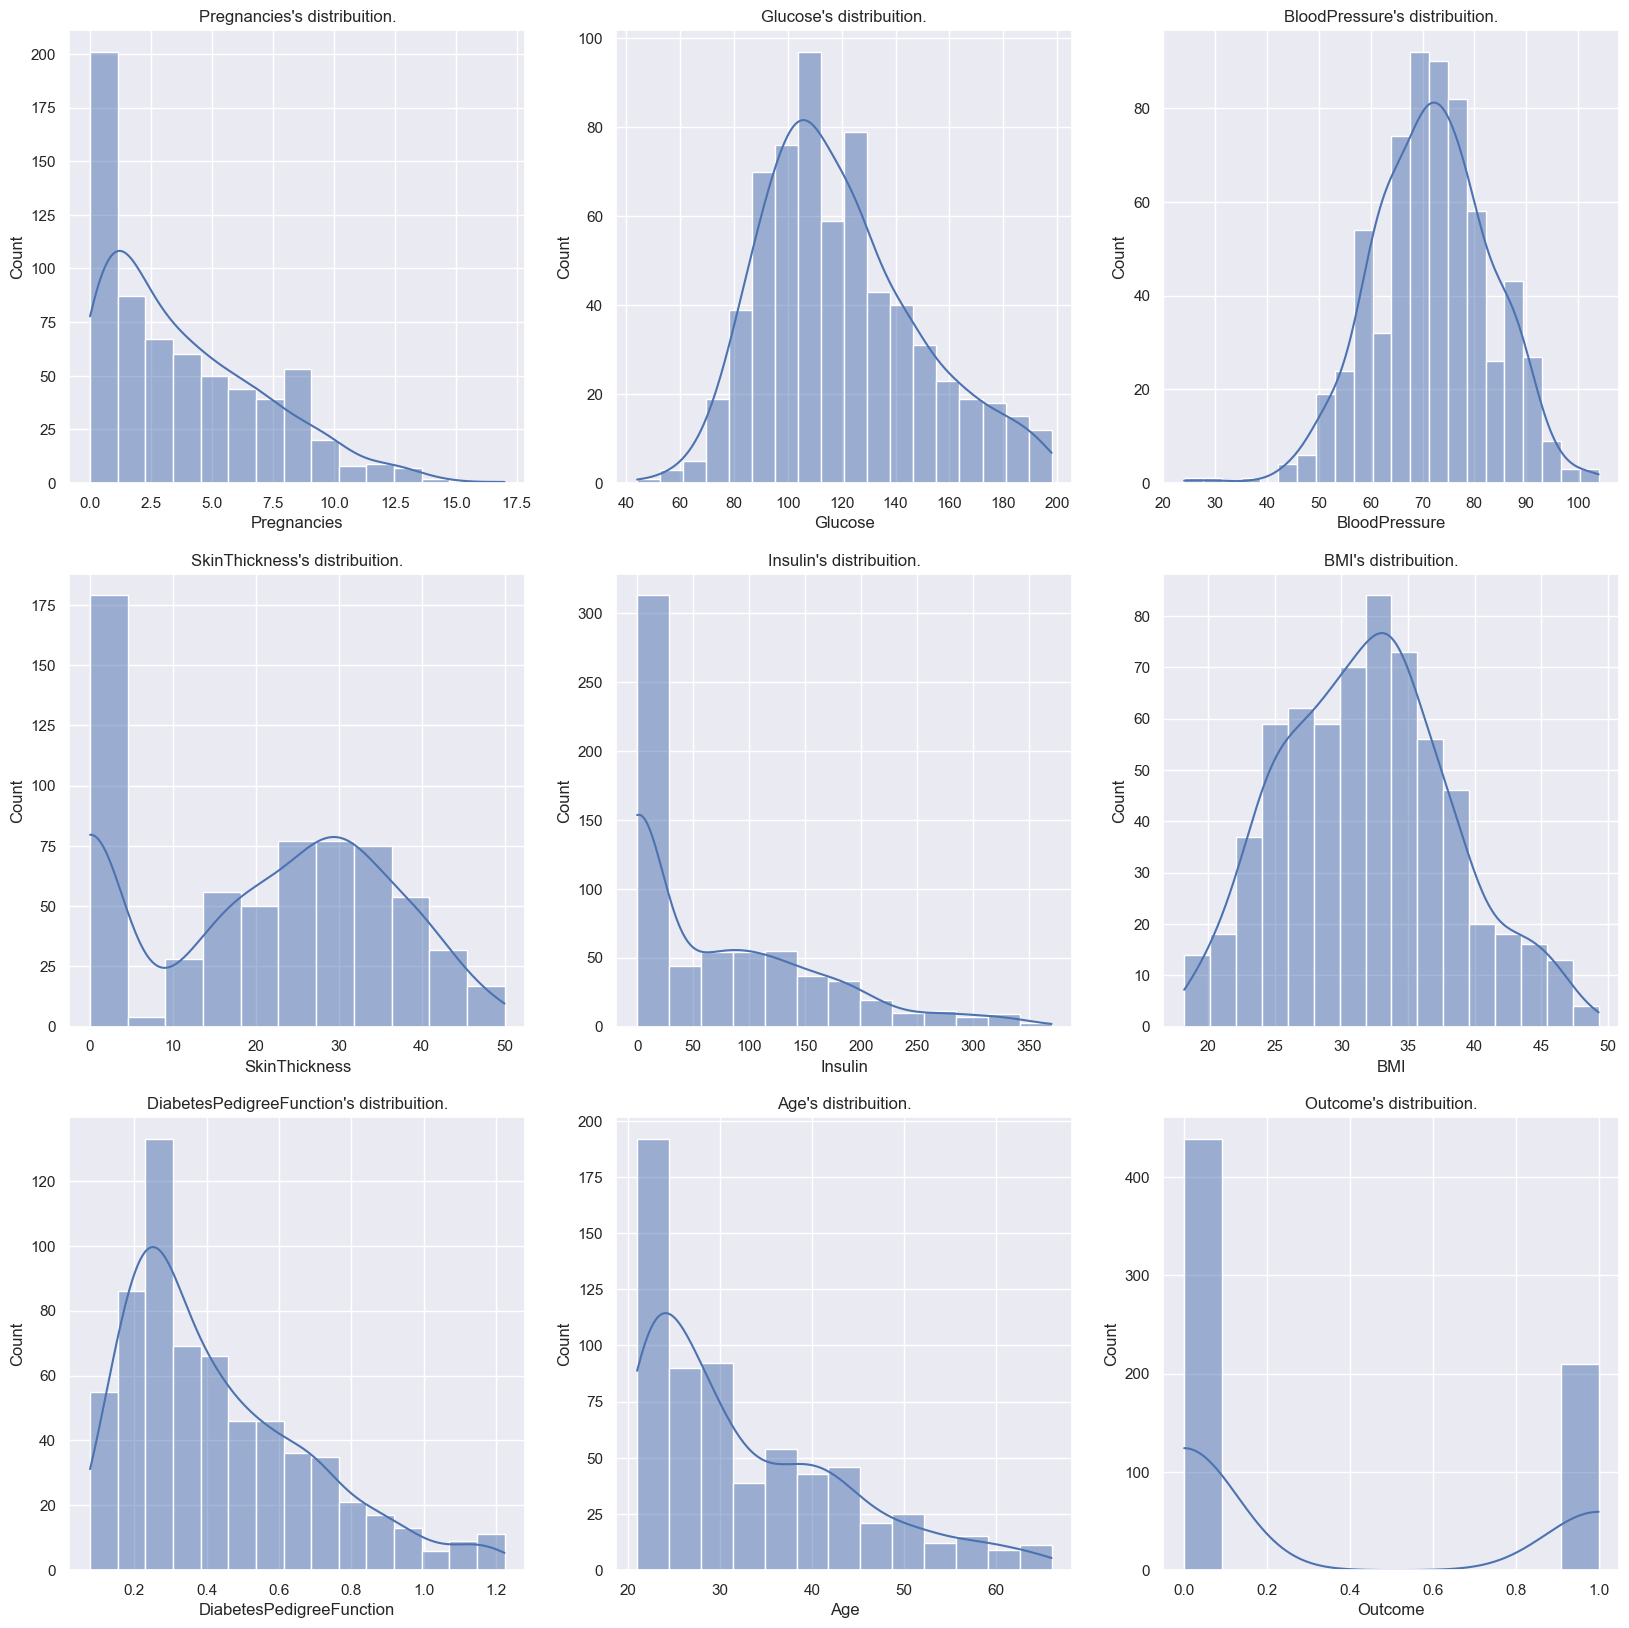

In [12]:
plt.figure(figsize=(20,20))
for tups in enumerate(df.columns):
    plt.subplot(3, 3, tups[0]+1)
    sns.set(rc={'figure.figsize':(7,5)})
    sns.histplot(data=df, x=tups[1], kde=True)
    plt.title("{}'s distribuition.".format(tups[1]))
plt.show()

0    500
1    268
Name: Outcome, dtype: int64


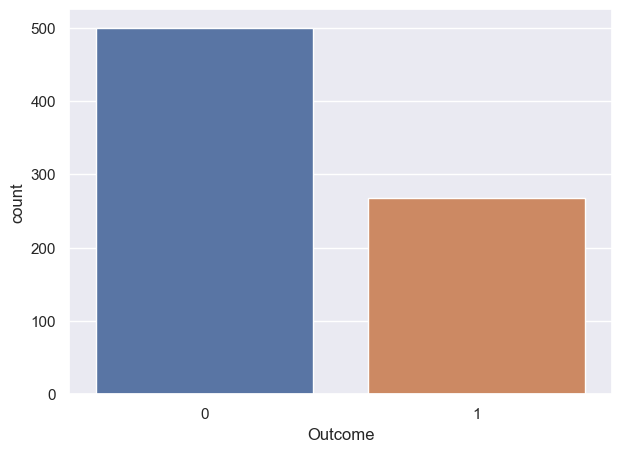

In [13]:
print(dataframe['Outcome'].value_counts())
sns.countplot(data=dataframe, x='Outcome')
plt.show()

0    439
1    210
Name: Outcome, dtype: int64


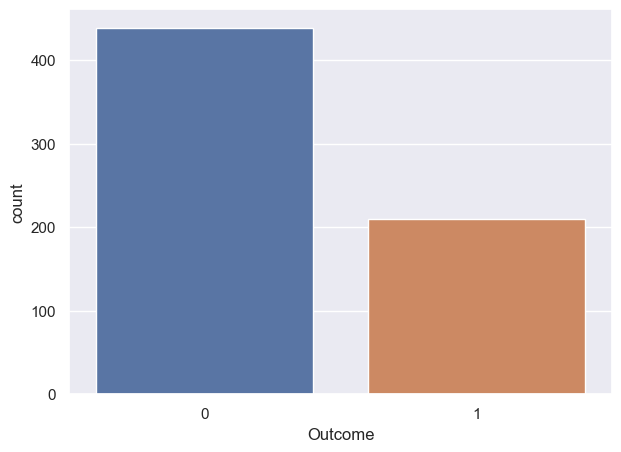

In [14]:
print(df['Outcome'].value_counts())
sns.countplot(data=df, x='Outcome')
plt.show()

### Observation: 
- Data is extremely unbalanced even after removing outliers

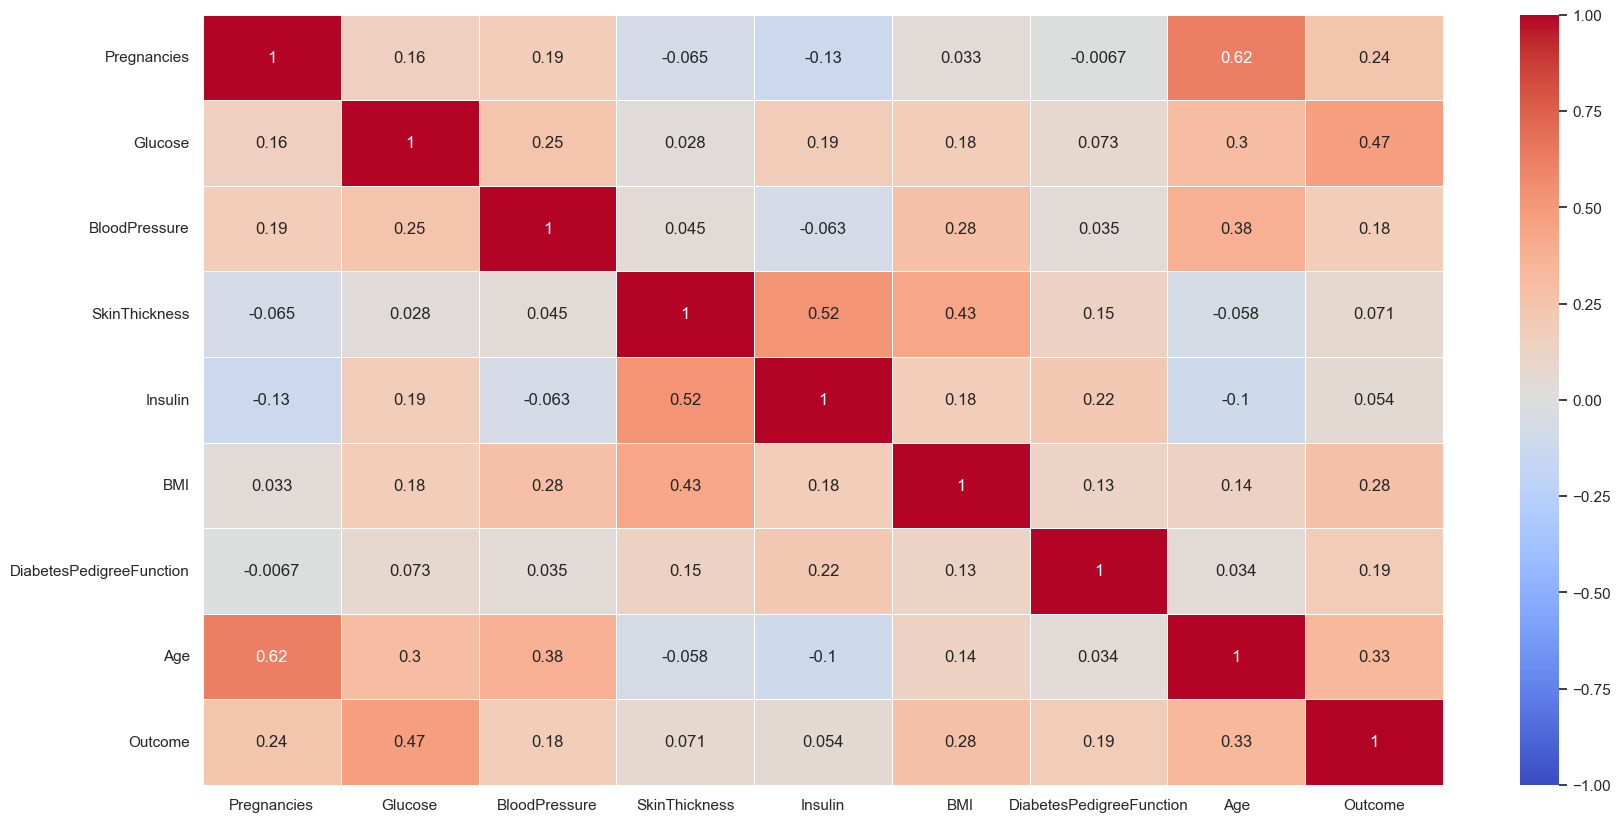

In [15]:
### Plotting heatmap for visualising the correlation between features
corr =  df.corr(method='spearman')
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(data=corr, annot=True, linewidths=0.5, cmap="coolwarm", vmin=-1, vmax=1)
plt.show()

## Splitting and Standarizing

In [16]:
# splitting the features and outcome
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
# splitting data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)
print("The shape of training data: ", X_train.shape, y_train.shape)
print("The shape of test data: ", X_test.shape, y_test.shape)

The shape of training data:  (486, 8) (486,)
The shape of test data:  (163, 8) (163,)


In [17]:
# Crating a standard scaler object
scaler=StandardScaler()
# using fit_transform to Standardize the train data
X_train=scaler.fit_transform(X_train)
# here using transform only to avoid data leakage
X_test=scaler.transform(X_test)

## Logistic regression

In [18]:
# Creating a Logistic regression object
logistic_reg=LogisticRegression()
# Passing independant and dependant training data to the model
logistic_reg.fit(X_train,y_train)
# Using model to predict outcome
y_pred=logistic_reg.predict(X_test)

In [19]:
# Evaluate the model's performance
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(acc*100))
print("Precision: {:.2f}%".format(prec*100))
print("Recall: {:.2f}%".format(rec*100))
print("F1-Score: {:.2f}".format(f1))

Accuracy: 82.21%
Precision: 77.50%
Recall: 60.78%
F1-Score: 0.68


### Hyper-paramter tuning logistic regression model

In [20]:
# Define the parameter grid for grid search CV
param_grid = {'C': [0.1, 1, 10]}
# Initialize the logistic regression model
log_reg = LogisticRegression()
# Initialize the grid search
grid_search = GridSearchCV(log_reg, param_grid, cv=5, error_score='raise')
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
# Print the best parameters and the best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: {:.2f}%".format(grid_search.best_score_ * 100))

Best parameters:  {'C': 10}
Best score: 77.77%


In [21]:
# use the best parameters found by grid search to make predictions
y_pred = grid_search.predict(X_test)

# Evaluate the model's performance
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(acc*100))
print("Precision: {:.2f}%".format(prec*100))
print("Recall: {:.2f}%".format(rec*100))
print("F1-Score: {:.2f}".format(f1))

Accuracy: 82.21%
Precision: 77.50%
Recall: 60.78%
F1-Score: 0.68


## Decision trees classification

Fitting the decision tree with default hyperparameters.

In [22]:
# creating decision tree classifier object
classifier = DecisionTreeClassifier(random_state=33)
# fitting the data into the model
classifier = classifier.fit(X_train, y_train)

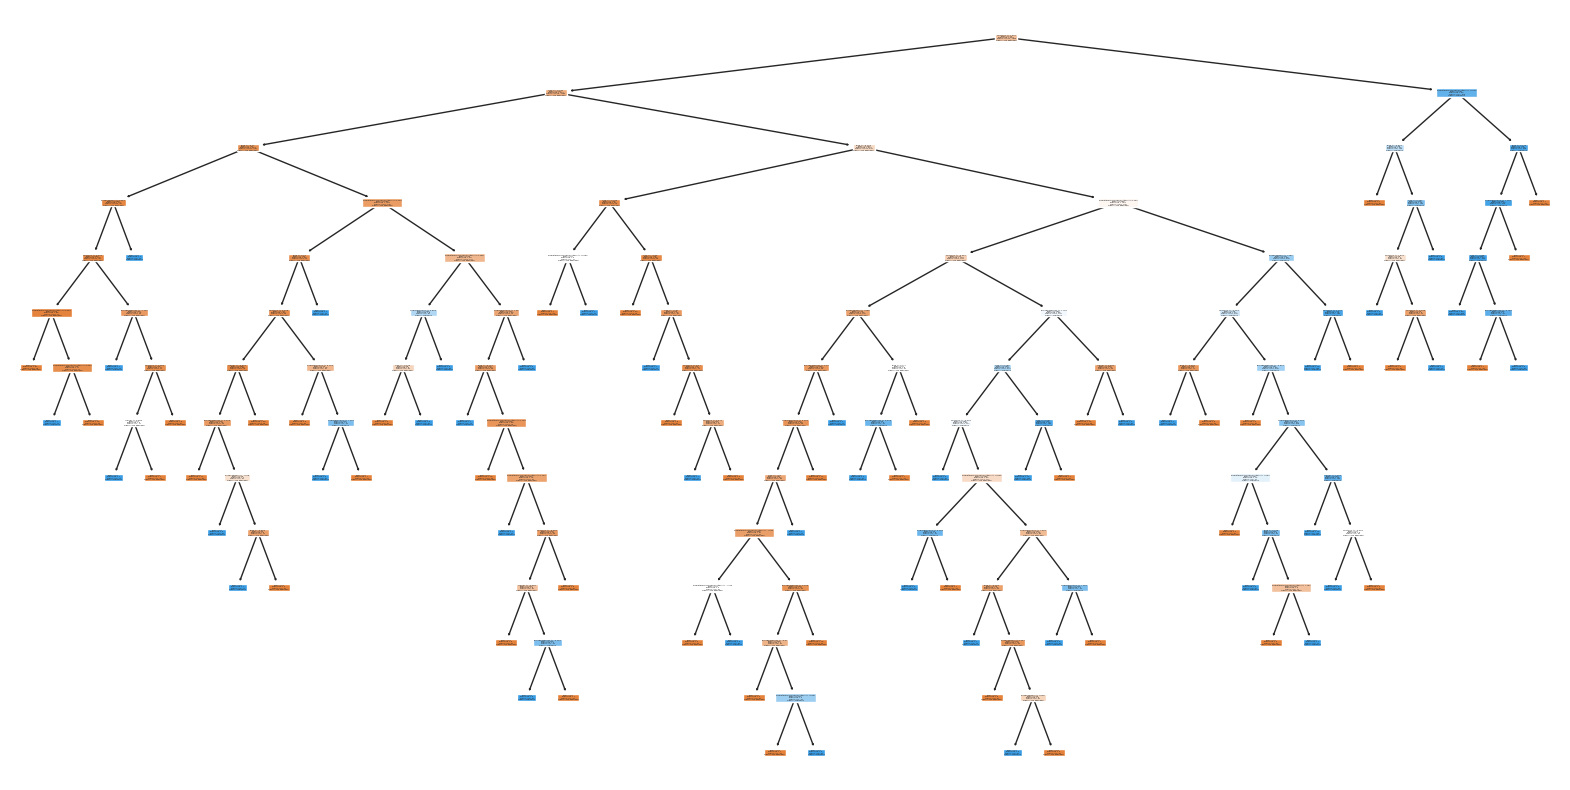

In [23]:
# plotting the decision tree to see how the depth
plt.figure(figsize=(20,10))
tree.plot_tree(classifier,feature_names=X.columns,class_names=['No Disease', "Disease"], filled=True)
plt.show()

In [24]:
# Using the model to predict outcome
y_pred = classifier.predict(X_test)
# Evaluate the model's performance
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(acc*100))
print("Precision: {:.2f}%".format(prec*100))
print("Recall: {:.2f}%".format(rec*100))
print("F1-Score: {:.2f}".format(f1))

Accuracy: 69.94%
Precision: 52.08%
Recall: 49.02%
F1-Score: 0.51


### Hyper-parameter tuning Decision Tree classifier

In [25]:
# creating a decision tree classifier object
classifier = DecisionTreeClassifier()
# Create the parameter grid based on the results of random search 
params = [
    {'max_depth': [2, 3, 5, 10, 20]},
    {'min_samples_leaf': [5, 10, 20, 50, 100]},
    {'criterion': ["gini", "entropy"]}
]
# using grid search to search for the best parameters
grid_search = GridSearchCV(estimator=classifier, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")


Fitting 4 folds for each of 12 candidates, totalling 48 fits


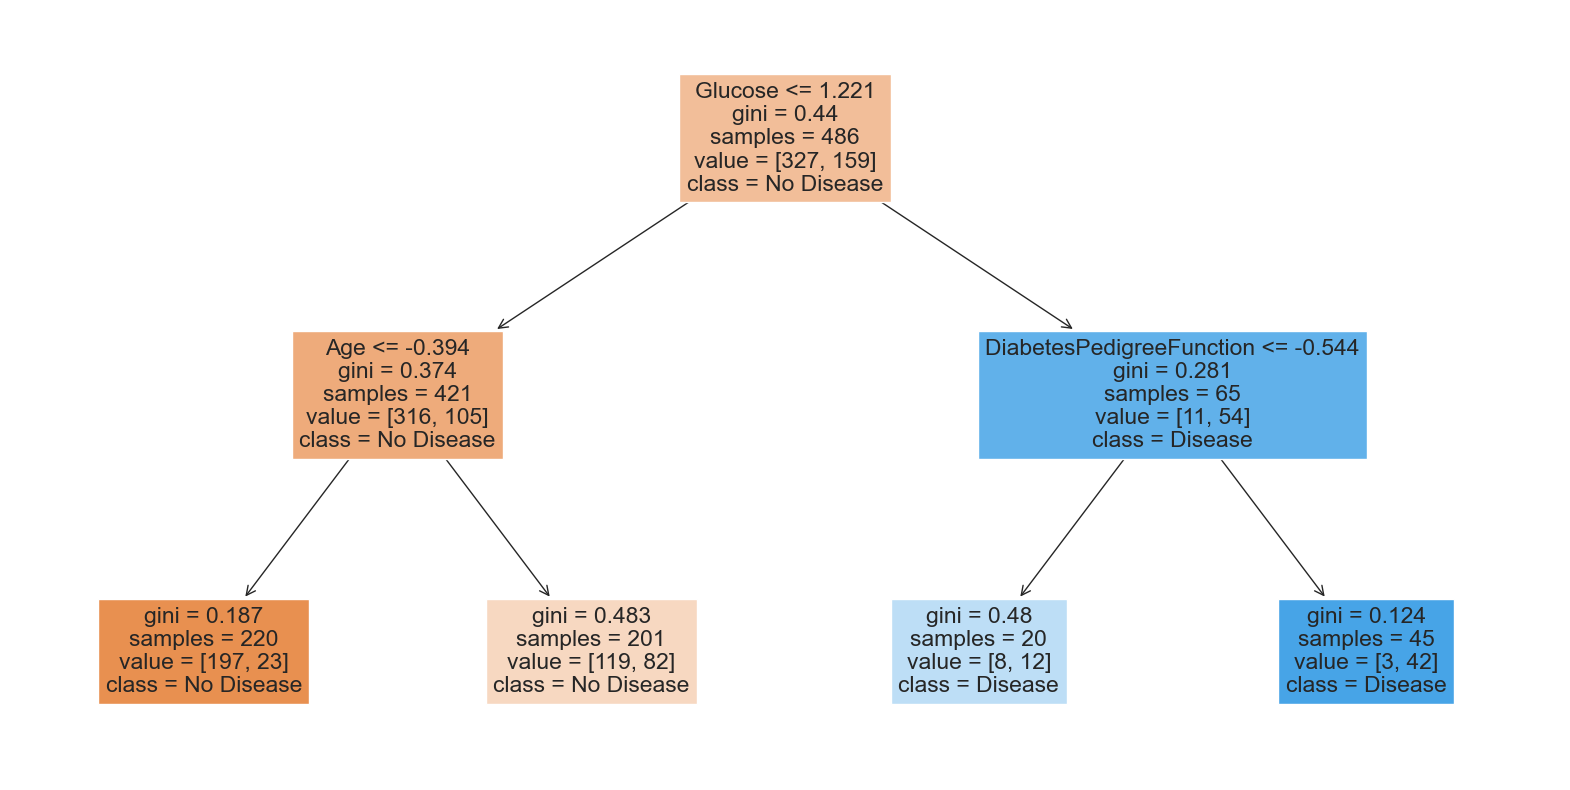

In [26]:

grid_search.fit(X_train, y_train)
plt.figure(figsize=(20,10))
tree.plot_tree(grid_search.best_estimator_, feature_names=X.columns,class_names=['No Disease', "Disease"], filled=True)
plt.show()

In [27]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 2}
0.7469516325701124


In [28]:
# using model to predict outcome
y_pred=grid_search.predict(X_test)
# Evaluate the model's performance
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(acc*100))
print("Precision: {:.2f}%".format(prec*100))
print("Recall: {:.2f}%".format(rec*100))
print("F1-Score: {:.2f}".format(f1))

Accuracy: 77.91%
Precision: 82.61%
Recall: 37.25%
F1-Score: 0.51


## KNN Classifier

In [29]:
# building the knn classifier object
knn=KNeighborsClassifier()
# fitting the data into the model
knn.fit(X_train,y_train)
# using the model to predict outcome
y_pred=knn.predict(X_test)

In [30]:
# Evaluate the model's performance
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(acc*100))
print("Precision: {:.2f}%".format(prec*100))
print("Recall: {:.2f}%".format(rec*100))
print("F1-Score: {:.2f}".format(f1))

Accuracy: 75.46%
Precision: 64.86%
Recall: 47.06%
F1-Score: 0.55


### Hyper-parameter tuning the KNN classifier

In [31]:
# Define the parameter grid for grid search CV
param_grid = {'n_neighbors': range(1, 50)}
# Initialize the KNN model
knn = KNeighborsClassifier()
# Initialize the grid search
grid_search = GridSearchCV(knn, param_grid, cv=5)
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
# Print the best parameters and the best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: {:.2f}%".format(grid_search.best_score_ * 100))

Best parameters:  {'n_neighbors': 29}
Best score: 76.96%


In [32]:
# use the best parameters found by grid search to make predictions
y_pred = grid_search.predict(X_test)

# Evaluate the model's performance
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(acc*100))
print("Precision: {:.2f}%".format(prec*100))
print("Recall: {:.2f}%".format(rec*100))
print("F1-Score: {:.2f}".format(f1))

Accuracy: 76.07%
Precision: 70.00%
Recall: 41.18%
F1-Score: 0.52


## Naive Bayes

In [33]:
# creating naiye bayes object
gnb = GaussianNB()
# fitting the data into the model
gnb.fit(X_train,y_train)
# predicting outcome using the model
y_pred=gnb.predict(X_test)

In [34]:
# Evaluate the model's performance
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(acc*100))
print("Precision: {:.2f}%".format(prec*100))
print("Recall: {:.2f}%".format(rec*100))
print("F1-Score: {:.2f}".format(f1))

Accuracy: 73.01%
Precision: 56.86%
Recall: 56.86%
F1-Score: 0.57
